<a href="https://colab.research.google.com/github/v2rinku/forqiskitalgo/blob/main/qrng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧪 Quantum Random Number Generator (QRNG) with Qiskit

###  What is a QRNG?

A **Quantum Random Number Generator (QRNG)** uses the fundamental **uncertainty** in quantum mechanics to generate **true randomness** — unlike classical algorithms, which are deterministic or pseudo-random.

At its core, QRNG works by:
- Putting a qubit in a **superposition** using a **Hadamard gate**, giving it an equal chance of being measured as `0` or `1`.
- **Measuring** the qubit causes it to collapse randomly into one of those two states.
- Repeating this process many times gives you a sequence of random bits.

---

## 🛠️ Requirements

Make sure you have the latest versions of Qiskit and Qiskit Aer:

```bash
pip install qiskit qiskit-aer
```

---


In [10]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler

def quantum_random_bits(num_bits=8):
    sampler = Sampler()
    random_bits = ""

    for _ in range(num_bits):
        # Create a 1-qubit quantum circuit
        qc = QuantumCircuit(1)
        qc.h(0)          # Hadamard gate to create superposition
        qc.measure_all() # Measure the qubit

        # Use the Sampler primitive to get a sample
        result = sampler.run(qc, shots=1).result()
        bit = list(result.quasi_dists[0].keys())[0]  # Get the bit ('0' or '1')
        random_bits += str(bit)

    return random_bits

# Generate and print 16 random bits
print("Quantum Random Bits:", quantum_random_bits(16))


Quantum Random Bits: 0011010101000010


<ipython-input-10-b782db212b72>:22: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  print("Quantum Random Bits:", quantum_random_bits(16))



## 🧠 How It Works

| Step | Description |
|------|-------------|
| 1️⃣ | **Create a 1-qubit quantum circuit** |
| 2️⃣ | Apply a **Hadamard gate** (`H`) to place the qubit in a 50/50 superposition of `|0⟩` and `|1⟩` |
| 3️⃣ | Measure the qubit — the result collapses randomly to `0` or `1` |
| 4️⃣ | Repeat for as many bits as needed |



##  Optional: Visualize Bit Distribution



<ipython-input-9-201a0a648162>:5: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  bits = quantum_random_bits(1000)


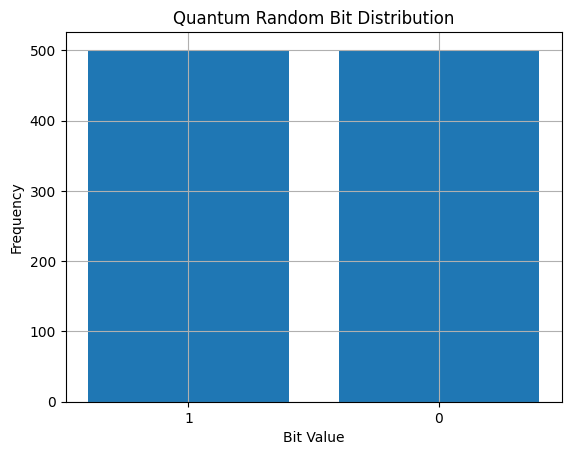

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Generate 1000 random bits
bits = quantum_random_bits(1000)

# Count frequency of 0s and 1s
bit_counts = Counter(bits)

# Plot
plt.bar(bit_counts.keys(), bit_counts.values())
plt.title("Quantum Random Bit Distribution")
plt.xlabel("Bit Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## 🧬 Why Quantum Randomness?

- **Classical RNGs** often rely on deterministic processes and are only pseudo-random.
- **Quantum mechanics** guarantees that certain outcomes are truly unpredictable — making QRNGs great for cryptography, simulations, and secure applications.

---
